In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
glass = pd.read_excel('glass.xlsx', sheet_name='glass')
df = glass.copy()

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Data Preprocessing 

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
df.shape

(214, 10)

### Visulization 

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

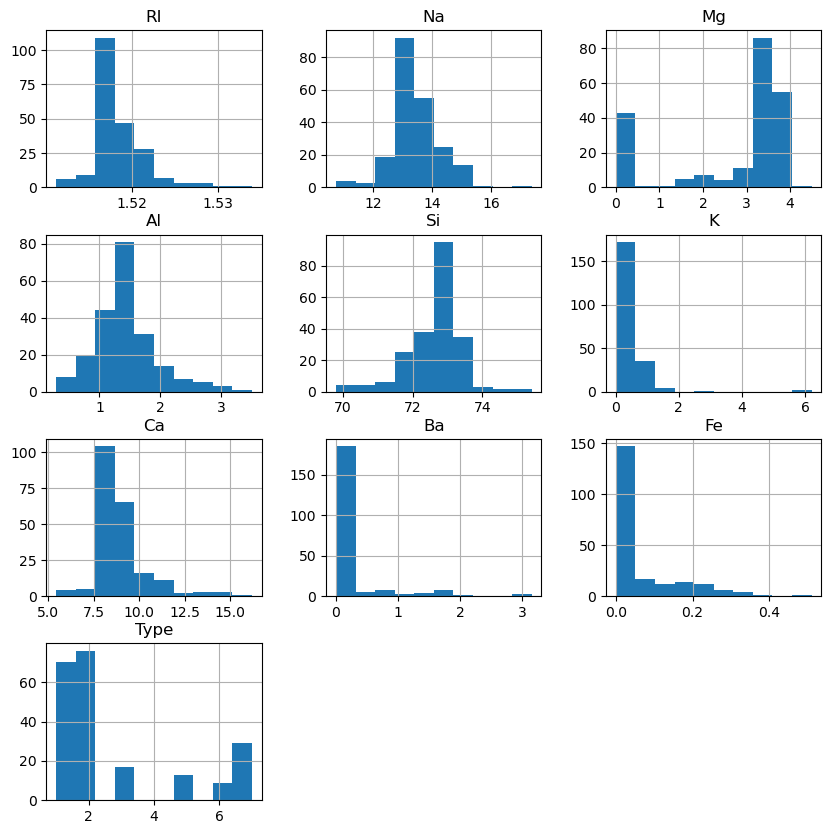

In [12]:
df.hist(figsize=(10,10))

### Box Plot 

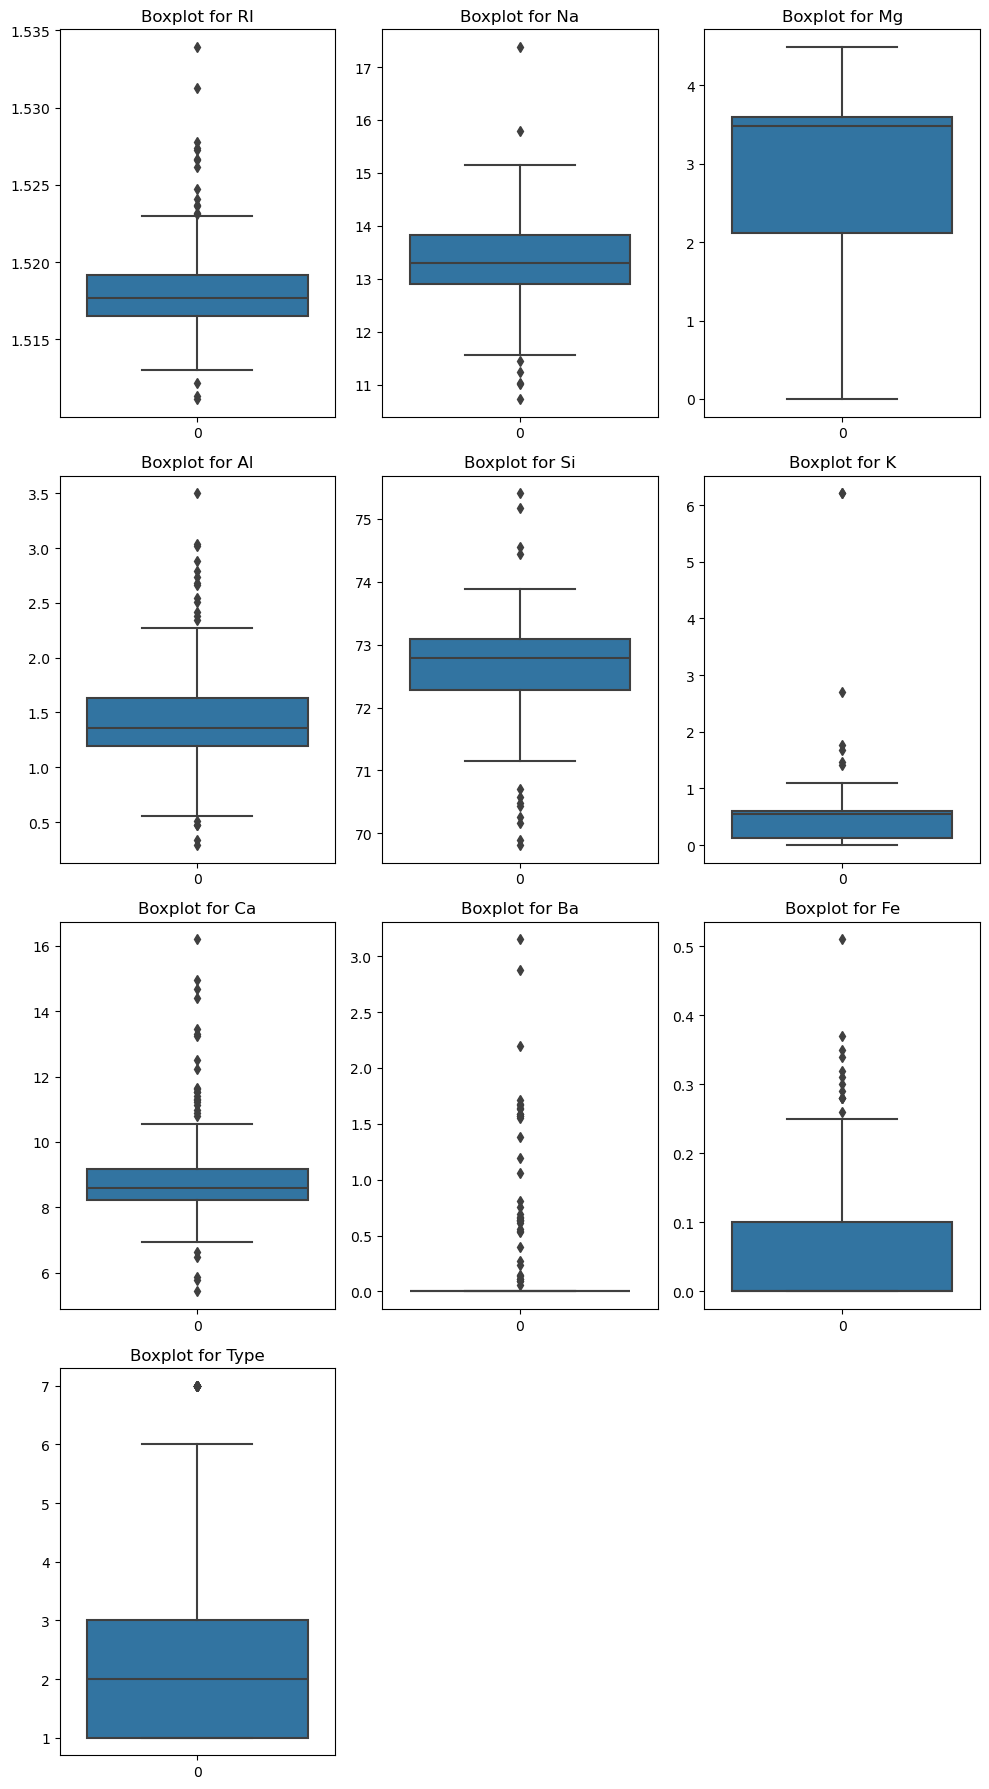

In [13]:
fig,axs=plt.subplots(nrows=4,ncols=3,figsize=(10,18))
axs = axs.flatten()
    
# Plot boxplots for each column in the DataFrame
for i, column in enumerate(df.columns):
    sns.boxplot(df[column], ax=axs[i])
    axs[i].set_title(f'Boxplot for {column}')
    
    # Remove any unused subplots
for i in range(len(df.columns), len(axs)):
    fig.delaxes(axs[i])
    
plt.tight_layout()
plt.show()

### Distribution Plot 

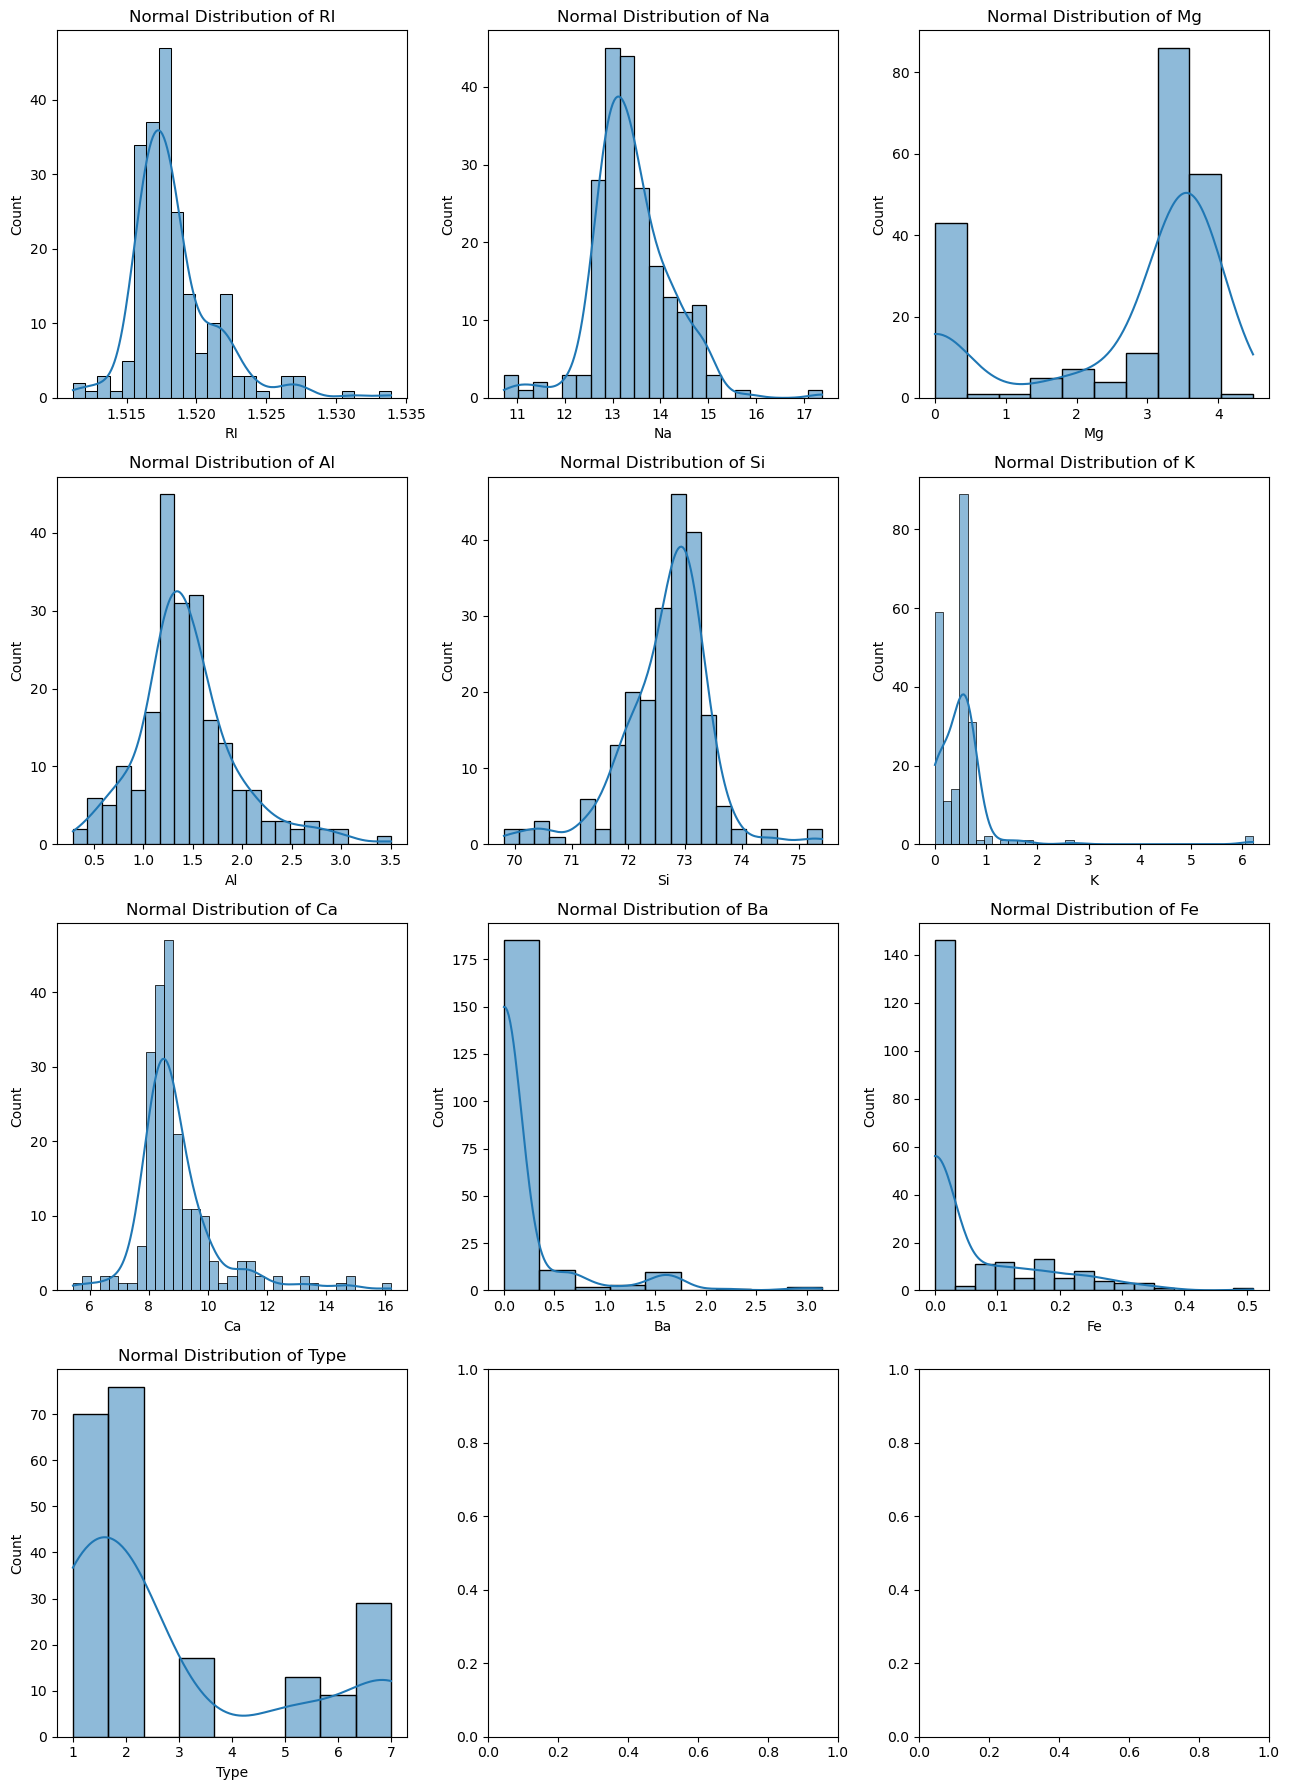

In [14]:
num_cols = len(df.columns)

# Create subplots
fig, axes = plt.subplots(nrows=4,ncols=3, figsize=(13, 18))
axes = axes.flatten()
# Iterate through numeric columns and plot their distributions
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Normal Distribution of {column}')

plt.tight_layout()
plt.show()

### Bar plot of Target 

<Axes: >

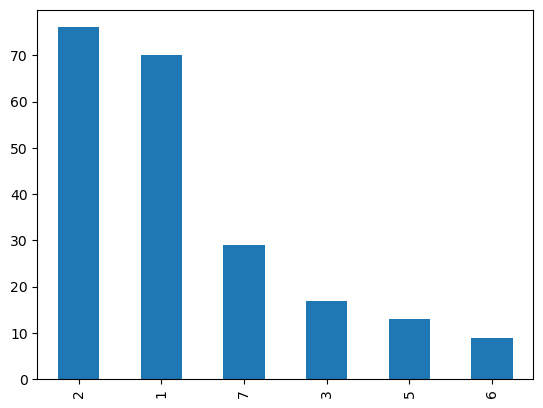

In [15]:
df['Type'].value_counts().plot.bar()

### Coorelation 

In [16]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [17]:
#High correlation between Ca and RI
df.drop(columns='Ca', inplace=True)

### Outlier Detection 

In [18]:
def outlier_detection(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3-q1
    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)
    return lower_extreme, upper_extreme, q1,q3

In [19]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,3.150000,0.510000,7.000000


In [20]:
print("RI")
print(outlier_detection(df,'RI'))
print("Na")
print(outlier_detection(df,'Na'))
print("Mg")
print(outlier_detection(df,'Mg'))
print("Si")
print(outlier_detection(df,'Si'))
print("K")
print(outlier_detection(df,'K'))
#print("Ca")
#print(outlier_detection(df,'Ca'))
print("Ba")
print(outlier_detection(df,'Ba'))
print("Fe")
print(outlier_detection(df,'Fe'))

RI
(1.5125700000000002, 1.52311, 1.5165225, 1.5191575)
Na
(11.531250000000004, 15.201249999999998, 12.9075, 13.825)
Mg
(-0.11250000000000071, 5.827500000000001, 2.1149999999999998, 3.6)
Si
(71.06875, 74.29875000000001, 72.28, 73.0875)
K
(-0.6087499999999999, 1.34125, 0.1225, 0.61)
Ba
(0.0, 0.0, 0.0, 0.0)
Fe
(-0.15000000000000002, 0.25, 0.0, 0.1)


### Split Data int x and y

In [21]:
Y = df["Type"]
X = df.iloc[:,0:9]

In [22]:
X.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0,1


In [23]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [24]:
from sklearn.preprocessing import RobustScaler
SS = RobustScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,1.263757,0.370572,0.680135,-0.590909,-1.250774,-1.015385,0.0,0.0,-0.5
1,-0.026565,0.643052,0.080808,0.000000,-0.074303,-0.153846,0.0,0.0,-0.5
2,-0.569260,0.250681,0.047138,0.409091,0.247678,-0.338462,0.0,0.0,-0.5
3,-0.007590,-0.098093,0.141414,-0.159091,-0.222910,0.030769,0.0,0.0,-0.5
4,-0.098672,-0.032698,0.094276,-0.272727,0.359133,-0.010256,0.0,0.0,-0.5


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Split the data into training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(SS_X, Y, test_size=0.2, random_state=42)

### # Randomforests - cross validation

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, f1_score, roc_auc_score,classification_report

In [28]:
training_acc=[]
testing_acc = []
from sklearn.ensemble import RandomForestClassifier

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(SS_X, Y, test_size=0.2, random_state=i)
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  training_acc.append(accuracy_score(y_train, model.predict(X_train)))
  testing_acc.append(accuracy_score(y_test, model.predict(X_test)))
           
# Print the training and testing accuracies
print("Training accuracy:",np.mean(training_acc))
print("Testing accuracy:", np.mean(testing_acc))

Training accuracy: 1.0
Testing accuracy: 0.9848837209302326


In [29]:
# Training accuracy: 1.0             Without dropping Ca 
# Testing accuracy: 0.7788372093023256


In [30]:
df.head(3)

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,1


In [31]:
training_acc = []
testing_acc = []
precision = []
recall = []
f1 = []
roc_auc = []
conf_matrices = []

for i in range(1, 101, 1):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(SS_X, Y, test_size=0.2, random_state=i)
    
    # Initialize and fit the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    training_acc.append(accuracy_score(y_train, y_train_pred))
    testing_acc.append(accuracy_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred, average='macro'))
    recall.append(recall_score(y_test, y_test_pred, average='macro'))
    f1.append(f1_score(y_test, y_test_pred, average='macro'))
           
# Print the evaluation metrics
print("Training accuracy:", np.mean(training_acc))
print("Testing accuracy:", np.mean(testing_acc))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score:", np.mean(f1))

Training accuracy: 1.0
Testing accuracy: 0.9848837209302326
Precision: 0.9671900192400191
Recall: 0.9708263138907876
F1 Score: 0.9649403281873871


In [32]:
print(classification_report(y_test, model.predict(X_test)))  

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.98        43
   macro avg       0.97      0.97      0.97        43
weighted avg       0.98      0.98      0.98        43



### Bagging 

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize lists to store evaluation metrics
training_acc = []
testing_acc = []
precision = []
recall = []
f1 = []

# Loop through different random states
for i in range(1, 101, 1):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(SS_X, Y, test_size=0.2, random_state=i)
    
    # Initialize and fit the model
    base_model = DecisionTreeClassifier()  # Base model for bagging
    model = BaggingClassifier(base_model)
    model.fit(X_train, y_train)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    training_acc.append(accuracy_score(y_train, y_train_pred))
    testing_acc.append(accuracy_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred, average='macro'))
    recall.append(recall_score(y_test, y_test_pred, average='macro'))
    f1.append(f1_score(y_test, y_test_pred, average='macro'))
           
# Print the evaluation metrics
print("Training accuracy:", np.mean(training_acc))
print("Testing accuracy:", np.mean(testing_acc))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score:", np.mean(f1))


Training accuracy: 1.0
Testing accuracy: 0.9988372093023256
Precision: 0.9961111111111112
Recall: 0.9955555555555554
F1 Score: 0.9952698412698413


## Boosting 

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize lists to store evaluation metrics
training_acc = []
testing_acc = []
precision = []
recall = []
f1 = []

# Loop through different random states
for i in range(1, 101, 1):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(SS_X, Y, test_size=0.2, random_state=i)
    
    # Initialize and fit the model
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    training_acc.append(accuracy_score(y_train, y_train_pred))
    testing_acc.append(accuracy_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred, average='macro'))
    recall.append(recall_score(y_test, y_test_pred, average='macro'))
    f1.append(f1_score(y_test, y_test_pred, average='macro'))
   
# Print the evaluation metrics
print("Training accuracy:", np.mean(training_acc))
print("Testing accuracy:", np.mean(testing_acc))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 Score:", np.mean(f1))

Training accuracy: 1.0
Testing accuracy: 0.9955813953488373
Precision: 0.9951676313739007
Recall: 0.9887569444444445
F1 Score: 0.9907380458772388
